---

<center>

# **12 Steps to Navier-Stokes**

<center>

---


## Step 3: Diffusion Equation in 1D

---

**Diffusion is about spreading** or smoothing, picture a drop of ink in water: over time it disperses evenly due to stochastic molecular motion or viscous effects, the equation

$$\frac{\partial u}{\partial t}= \nu \frac{\partial^2 u}{\partial x^2}$$

The first thing you should notice is that —unlike the previous two simple equations we have studied— this equation has a second-order derivative. We first need to learn what to do with it!

### Discretizing $\frac{\partial^2 u}{\partial x^2}$

Geometrically speaking the second derivative can be thought as the tangent to the curve given by the first derivative. We will discretize the second derivative using the **Central difference**, a combination of Forward and Backward difference.

First, consider the **Taylor expansion** of $u_{i+1}$ and $u_{i-1}$ around $u_i$

$$u_{i+1} = u_i + \Delta x \frac{\partial u}{\partial x}\bigg|_i + \frac{\Delta x^2}{2} \frac{\partial ^2 u}{\partial x^2}\bigg|_i + \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\bigg|_i + O(\Delta x^4)$$

$$u_{i-1} = u_i - \Delta x \frac{\partial u}{\partial x}\bigg|_i + \frac{\Delta x^2}{2} \frac{\partial ^2 u}{\partial x^2}\bigg|_i - \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\bigg|_i + O(\Delta x^4)$$

Notice that adding those two expansions the odd-numbered derivative terms cancel each other out. Then neglecting the higher order terms ($O(4)$ and so on) then we can rearrange the sum to solve for the second derivative

$$\frac{\partial ^2 u}{\partial x^2}=\frac{u_{i+1}-2u_{i}+u_{i-1}}{\Delta x^2} + O(\Delta x^2)$$

### Back to Step 3

Now we are in conditions to write our discretized diffusion equation in 1D

$$\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\nu\frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\Delta x^2}$$

As before, we notice that once we have an initial condition, the only unknown is $u_{i}^{n+1}$, so we re-arrange the equation solving for our unknown:

$$u_{i}^{n+1}=u_{i}^{n}+\frac{\nu\Delta t}{\Delta x^2}(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n})$$

The above discrete equation allows us to write a program to advance a solution in time. But we need an initial condition. Let's continue using our favorite: the hat function. So, at $t=0$, $u=2$ in the interval $0.5\le x\le 1$ and $u=1$ everywhere else.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import time, sys
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

In [88]:
grid_points = 151                              # Number of grid points
grid_length = 5                                # Lenght of the grid
dx = grid_length / (grid_points - 1)           # Distance between adjacent grid points
time_steps = 301                               # Number of time steps
sigma = 0.25                                   # CFL number
dt = sigma * (dx**2 / nu)                               # Size of time steps
nu = 0.3                                       # Diffusion coefficient

u = np.ones(grid_points)
u[int(0.5 / dx) : int((1 / dx) + 1)] = 2
u_n = u_n = np.ones(grid_points)

x = np.linspace(0, grid_length, grid_points)

(-0.1, 2.0)

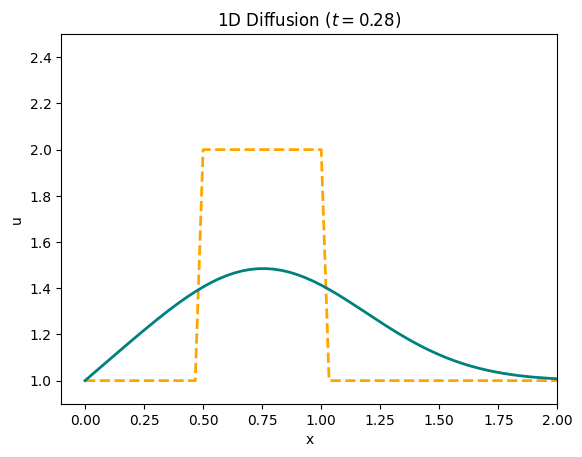

In [89]:
fig, ax1 = plt.subplots()
ax1.plot(x, u, c='orange', linestyle='--', lw=2)

for n in range(time_steps):
    u_n = u.copy()
    for i in range(1, grid_points-1):
        u[i] = u_n[i] + nu * (dt / (dx ** 2)) * (u_n[i+1] - 2*u_n[i] + u_n[i-1])

# fig, ax1 = plt.subplots()
ax1.plot(x, u_n, color='#008080', lw=2)
ax1.set_title(rf'1D Diffusion ($t={time_steps*dt:.2f}$)')
ax1.set_xlabel("x")
ax1.set_ylabel("u")
ax1.set_ylim(0.9, 2.5)
ax1.set_xlim(-0.1, 2)


It can easily be seen that the initial conditions, the hat function, diffused over time. The characteristics of the equation smoothens sharp edges and tends to equilibrium.

Now, the animation

In [73]:
plt.ioff()

fig, ax2 = plt.subplots()
fig.set_size_inches(6, 5)
ax2.set_title(rf'1D Diffusion (from $t=0$ to $t={time_steps*dt:.2f}$)', fontsize = 12)
ax2.set_xlabel("x", fontsize=12)
ax2.set_ylabel("u", fontsize=12)
ax2.set_ylim(0.9, 2.5)
ax2.set_xlim(-0.1, 2)
ax2.grid(True, linestyle='--', alpha=0.3)

line, = ax2.plot([], [], color='#008080', lw=2)

u = np.ones(grid_points)
u[int(0.5 / dx) : int((1 / dx) + 1)] = 2

def init():
    line.set_data([], [])
    return line,

def update_anim(j):
    u_n = u.copy()
    for i in range(1, grid_points-1):
        u[i] = u_n[i] + nu * (dt / (dx ** 2)) * (u_n[i+1] - 2*u_n[i] + u_n[i-1])
    line.set_data(x, u)
    return line,

anim = animation.FuncAnimation(
                fig = fig,
                func = update_anim,
                init_func = init,
                frames = time_steps,
                interval = 50,
                blit = True
)

anim.save('1D_diffusion.mp4', writer=animation.FFMpegWriter(fps=30))

plt.ion()

One last note, an insight related to the difference between convection behaviour and diffusion can be obtained via analyzing the iteration loop to compute `u`. Notice `for i in range(1, grid_points-1):`, here we do not iterate over the last grid point for two reasons:

* `u[i] = u_n[i] + nu * (dt / (dx ** 2)) * (u_n[i+1] - 2*u_n[i] + u_n[i-1])` $\rightarrow i+1$ does not exist inside the grid, raises error
* Diffusion is a closed system with closed ends, i.e IC's.

It is easier to understand it following the latter one, in convection the wave traveled from left to right, for that very reason the right-most IC's was not defined because it lacks importance in this problem and the end point can be updated with no problem.